<a href="https://colab.research.google.com/github/umanniyaz/Uman/blob/master/Cardiovascular_disease_Detection_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#importing libraries


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as py

In [0]:
 data=pd.read_csv('/content/drive/My Drive/cardio_train.csv',sep=';')

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#Stats about Data.

data.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#We need to know information about data and datatype.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
#We will check the shape of the data

data.shape

(70000, 13)

In [10]:
#Check if null values in the columns.

data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [0]:
#As age feature is given in number of days so what we do is convert it into years


data['age']=data['age']/365

In [12]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
#Lets first drop the column id as its not important

data=data.drop('id',axis=1)

In [14]:
#Lets Check whether the change is made

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
#Now as the features are not understood i will replace them with the original name

data.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [16]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
# Now the we have to predict cardiovascular disease so lets rename this column and set it as target

data.rename(columns={'cardiovascular disease': 'target'},inplace='True')

In [18]:
# Check Duplicate entries
data.duplicated().sum()

24

In [19]:
data[data.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
10562,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21784,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
38505,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
40365,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
42450,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
44653,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
45125,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45748,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45810,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48917,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [0]:
#Dropping these duplicate values

data.drop_duplicates(inplace=True)

In [21]:
data.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.339589,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.759930,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#The values for weights and heights at maximum are unlikely or outliers.
#So remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [23]:
data.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
count,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000
mean,53.349959,1.347890,164.497823,73.546415,128.818912,95.959462,1.359184,1.222737,0.086385,0.052896,0.803672,0.498277
std,6.745524,0.476305,6.863199,11.721811,161.017939,186.322126,0.674872,0.568992,0.280934,0.223828,0.397223,0.500001
min,29.583562,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.438356,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.986301,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.419178,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Diseased 32031
NotDiseased 31811


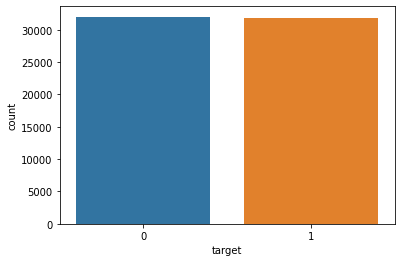

In [24]:
#After cleaning,Now i need to check whether the dataset is balanced or imbalanced.
#To draw various insights from data we will use visualization techniques


ax=sns.countplot(data['target'],label = 'Count')
Y,N=Diseased,NotDiseased=data['target'].value_counts()
print('Diseased', Y)
print('NotDiseased', N)

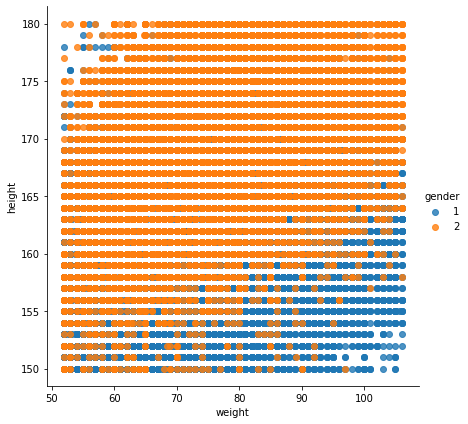

In [25]:
#to check weights and heights of males and females

sns.lmplot(x='weight', y='height', hue='gender', data=data, fit_reg=False, height=6)
py.show()

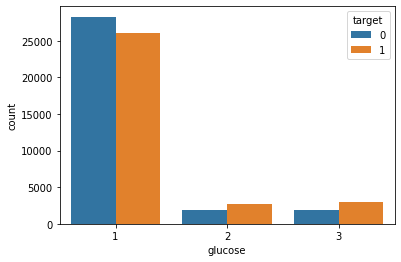

In [26]:
#Exploratory Data Analysis
#Now lets try to find correlation of features with the target

#correlation between glucose with target

#normal level=1,above normal=2,high=3

sns.countplot(x='glucose', hue='target', data=data)
py.show()

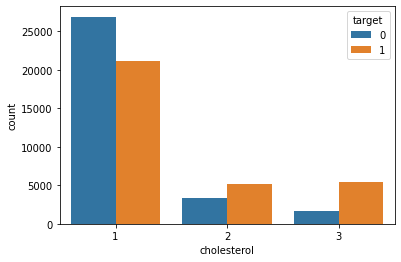

In [27]:
sns.countplot(x='cholesterol', hue='target', data=data)
py.show()

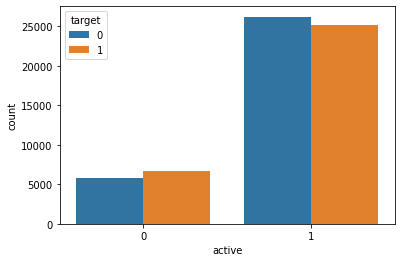

In [28]:
sns.countplot(x='active', hue='target', data=data)
py.show()

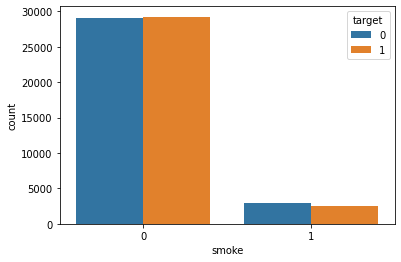

In [29]:
sns.countplot(x='smoke', hue='target', data=data)
py.show()

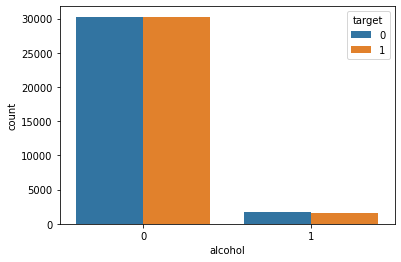

In [30]:
sns.countplot(x='alcohol', hue='target', data=data)
py.show()

In [0]:
#I will move to feature engineering before that we need to add up one feature Body Mass Index .
#to check what are the chances for persons  getting a disease because being obese,underweight etc..
#i will define a function for BMI


def BMI(data):
    return data['weight'] / (data['height']/100)**2
 
data['bmi'] = data.apply(BMI, axis=1)

In [32]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [0]:
#On the basis of BMI we assign weight_status feature  under different catagories

data['weight_status'] = data['bmi'].apply(lambda x :'Underweight' if x <= 18.5 else ('Normal' if (x > 18.5 and x <= 24.9) else ( 'Overweight' if (x > 24.9 and x <= 29.9) else 'obese')) )

In [0]:
# i will use pulse indicator that also has a effect on target

data['pulse pressure'] = data['systolic'] - data['diastolic']

In [35]:
# To check High BMI value person correlation to cardio vascular diseases

data[(data['pulse pressure'] >= 60 ) & (data['cholesterol'] == 3)].head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi,weight_status,pulse pressure
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,Normal,60
61,57.424658,2,165,75.0,180,90,3,1,0,0,1,1,27.548209,Overweight,90
194,60.243836,1,162,62.0,140,80,3,1,0,0,1,1,23.624447,Normal,60
221,48.194521,1,157,70.0,160,100,3,1,0,0,0,1,28.398718,Overweight,60


In [0]:
# Splitting data into training and testing datasets


X = data.drop(['weight_status', 'target'], axis=1)
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [0]:
#Now we will do scaling of data by feature scaling by importing library StandardScaleer

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
#Check length of train set 

len(X_train)

57457

In [39]:
len(y_train)

57457

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [58]:
classifier = Sequential()
classifier.add(Dense(output_dim=7, init='uniform', activation = 'softsign' , input_dim=13))


classifier.add(Dense(output_dim=7, init='uniform', activation = 'softsign'))


classifier.add(Dense(output_dim=1, init='uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softsign", input_dim=13, units=7, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softsign", units=7, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
classifier.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
classifier.fit(X_train,y_train,batch_size=100,nb_epoch=150)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
57457/57457 [==============================] - 2s 35us/step - loss: 0.5934 - accuracy: 0.6898
Epoch 2/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5579 - accuracy: 0.7253
Epoch 3/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5565 - accuracy: 0.7258
Epoch 4/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5553 - accuracy: 0.7275
Epoch 5/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5543 - accuracy: 0.7270
Epoch 6/150
57457/57457 [==============================] - 2s 34us/step - loss: 0.5536 - accuracy: 0.7281
Epoch 7/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5526 - accuracy: 0.7277
Epoch 8/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5520 - accuracy: 0.7274
Epoch 9/150
57457/57457 [==============================] - 2s 33us/step - loss: 0.5515 - accuracy: 0.7292
Epoch 10/150
57457/57457 [====================

In [0]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7285826155050901